In [ ]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules

Segments to look out for that had no axon
864691135012395766 # one of the split segments files not there (split index = 1)
864691135865584005 #soma soma merger
864691136451113215 #it was an inhibitory neuron (part of split)

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-06-23 17:43:13,550 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-23 17:43:13,552 - settings - Setting database.user to celiib
INFO - 2021-06-23 17:43:13,552 - settings - Setting database.password to newceliipass
INFO - 2021-06-23 17:43:13,553 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-23 17:43:13,553 - settings - Setting database.user to celiib
INFO - 2021-06-23 17:43:13,554 - settings - Setting database.password to newceliipass
INFO - 2021-06-23 17:43:13,560 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/de

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-06-23 17:43:14,212 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-23 17:43:14,253 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-23 17:43:14,254 - settings - Setting database.user to celiib
INFO - 2021-06-23 17:43:14,255 - settings - Setting database.password to newceliipass
INFO - 2021-06-23 17:43:14,255 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-23 17:43:14,802 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-23 17:43:14,891 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-23 17:43:14,892 - settings - Setting database.user to celiib
INFO - 2021-06-23 17:43:14,893 - settings - Setting database.password to newceliipass
INFO - 2021-06-23 17:43:14,893 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-23 17:43:14,894 - settings - Setting database.user to celiib
INFO - 2021-06-23 17:43:14,895 - settings - Setting database.pa

In [3]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-06-23 17:43:15,688 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-06-23 17:43:15,708 - settings - Setting database.user to celiib
INFO - 2021-06-23 17:43:15,710 - settings - Setting database.password to newceliipass
INFO - 2021-06-23 17:43:15,716 - settings - Setting enable_python_native_blobs to True
INFO - 2021-06-23 17:43:16,447 - settings - Setting enable_python_native_blobs to True


In [4]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [5]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [ ]:
"""
Pseudocode: 
1) Check if there are multiple somas associated with that segment

"""

In [ ]:
axon_segs = dj.U("segment_id") & (minnie.DecompositionAxon() 
                      & minnie.AutoProofreadValidationSegment4() - minnie.AutoProofreadValidationSegmentExclude4() )
axon_segs

In [ ]:
"""
Pseudocode: 
1) Find the coordinates of the nucleus for that new segment
2) Make sure that same number of DecompositionAxon objects as in Decomposition
3) Pick the neuron object that is closest and within a certain range of the nucleus
4) Download the neuron object
5) Run the proofreading
6) Save off the validation df
"""

In [22]:
minnie.AutoProofreadValidationScore6()

ver materialization version,nucleus_id nucleus id,segment_id the segment id in the proofread version,old_ver materialization version,split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,decomposition saved neuron object with high fidelity axon,axon_length axon length of the filtered neuron,validation_df,validation_df_ext,pre_tp,pre_tn,pre_fp,pre_fn,pre_precision,pre_recall,pre_f1,post_tp,post_tn,post_fp,post_fn,post_precision,post_recall,post_f1,run_time the amount of time to run (seconds)
88.00,269247,864691135584074360,0.08,0,=BLOB=,1993.0556380165044,=BLOB=,=BLOB=,187,10,4,83,0.9790575916230366,0.6925925925925925,0.8112798264642083,805,0,7,66,0.9913793103448276,0.9242250287026407,0.9566250742721331,280.0


In [ ]:
bad_postsyn_table = (minnie.AutoProofreadValidationScore5() & "post_fn>200")
bad_postsyn_table_filt =  (bad_postsyn_table * minnie.AutoProofreadValidationSegmentMap4()) & axon_segs.proj(old_segment_id="segment_id")
#bad_postsyn_seg_ids = bad_postsyn_table.fetch("segment_id")
bad_postsyn_table_filt.proj("post_fn")

In [ ]:
import datajoint as dj
dj.config["display.limit"] = 30
bad_presyn_table = (minnie.AutoProofreadValidationScore5() & "pre_fp>10")
bad_presyn_seg_ids = bad_presyn_table.fetch("segment_id")
bad_presyn_table

In [ ]:
# multi_soma_keys = (minnie.AutoProofreadValidationSegmentMap4() & "n_somas>1"
#                       & minnie.DecompositionAxon.proj(old_segment_id="segment_id")
#                   & dict(segment_id = 864691135415710906)).proj().fetch(as_dict=True)
# key = multi_soma_keys[0]
# key

In [23]:
segment_id = 864691135953898760
segment_id = 864691136118618136
segment_id = 864691135584074360
key = dict(segment_id=segment_id)

In [33]:
verbose = True

segment_id = key["segment_id"]
if verbose:
    print(f"\n-- Working on neuron {segment_id}---")

segment_map_dict = (minnie.AutoProofreadValidationSegmentMap4() & dict(segment_id=segment_id)).fetch1()

#1) Find the coordinates of the nucleus for that new segment
nucleus_id = segment_map_dict["nucleus_id"]
nuc_center_coords = du.nuclei_id_to_nucleus_centers(nucleus_id)
if verbose:
    print(f"nuc_center_coords = {nuc_center_coords}")

#2) Make sure that same number of DecompositionCellType objects as in Decomposition
old_segment_id = segment_map_dict["old_segment_id"]
if verbose:
    print(f"old_segment_id = {old_segment_id}")

search_key = dict(segment_id=old_segment_id)
n_somas = len(minnie.BaylorSegmentCentroid() & search_key)
n_decomp_axon = len(minnie.DecompositionCellType() & search_key)
if verbose:
    print(f"# of somas = {n_somas} and # of DecompositionCellType = {n_decomp_axon}")


if n_somas != n_decomp_axon:
    raise Exception(f"# of somas = {n_somas} NOT MATCH # of DecompositionCellType = {n_decomp_axon}")

#3) Pick the neuron object that is closest and within a certain range of the nucleus
neuron_objs,split_idxs = du.decomposition_with_spine_recalculation(old_segment_id)
if n_somas > 1:
    """
    Finding the closest soma:
    1) For each neuron object get the mesh center of the soma object
    2) Find the distance of each from the nucleus center
    3) Find the arg min distance and make sure within threshold
    4) Mark the current neuron and the current split index
    """
    nuclei_distance_threshold = 15000

    soma_center_coords = [k["S0"].mesh_center for k in neuron_objs]
    soma_distances = [np.linalg.norm(k-nuc_center_coords) for k in soma_center_coords]
    min_dist_arg = np.argmin(soma_distances)
    min_dist = soma_distances[min_dist_arg]

    if verbose:
        print(f"soma_distances = {soma_distances}")
        print(f"min_dist_arg = {min_dist_arg}, with min distance = {min_dist}")

    if min_dist > nuclei_distance_threshold:
        raise Exception(f"min_dist ({min_dist}) larger than nuclei_distance_threshold ({nuclei_distance_threshold})")

    neuron_obj = neuron_objs[min_dist_arg]
    split_index = split_idxs[min_dist_arg]

    if verbose:
        print(f"Winning split_index = {split_index}")
else:
    split_index = split_idxs[0]
    neuron_obj = neuron_objs[0]
    
(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)
    


-- Working on neuron 864691135584074360---
nuc_center_coords = [710144 855296 795760]
old_segment_id = 864691136105498585
# of somas = 1 and # of DecompositionCellType = 1
**Using table __decomposition_cell_type for table_to_neuron_objs**
Decompressing Neuron in minimal output mode...please wait
Dont need spine recalculation
Number of Neurons found = 1

--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {'perform_synapse_filter': False}


Recieved another instance of Neuron class in init -- so just copying data
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = Fal

perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_synapse_filter = False
perform_

Segment Id = 864691136105498585
Postsyn counts:
TP:869
TN:0
FP:7
FN:2
Presyn counts:
TP:190
TN:9
FP:6
FN:79


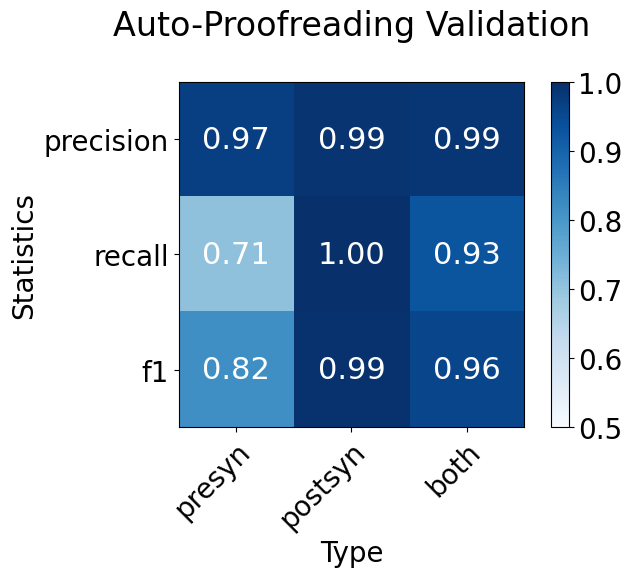

In [34]:
vu.synapse_validation_df_to_score_plot(return_validation_df_revised)

In [35]:
# nviz.plot_axon(filt_neuron)

In [27]:
# import neuron_visualizations as nviz
# nviz.visualize_neuron(filt_neuron,
#                       limb_branch_dict="all")

In [32]:
minnie.DecompositionCellType() & dict(segment_id=filt_neuron.segment_id)

segment_id segment id unique within each Segmentation,decimation_version,decimation_ratio ratio of remaining mesh vertices/faces (which ones depends on what metric the decimation technique uses),ver the version number of the materializaiton,process_version the version of the preprocessing pipeline run,index the index of the neuron object that resulted from that mesh (indexed starting at 0),split_index the index of the neuron object that resulted AFTER THE SPLITTING ALGORITHM,axon_version key by which to lookup the finer axon processing method,decomposition saved neuron object with high fidelity axon,nucleus_id id of nucleus from the flat segmentation Equivalent to Allen: 'id'.,nuclei_distance the distance to the closest nuclei (even if no matching nuclei found),n_nuclei_in_radius the number of nuclei within the search radius of 15000 belonging to that segment,n_nuclei_in_bbox the number of nuclei within the bounding box of that soma,cell_type_predicted morphology predicted by classifier,spine_category,n_axons Number of axon candidates identified,n_apicals Number of apicals identified,axon_angle_maximum the anlge of an identified axon,spine_density_classifier the number of spines divided by skeletal length for branches analyzed in classification,n_branches_processed the number branches used for the spine density analysis,skeletal_length_processed The total skeletal length of the viable branches used for the spine density analysis,n_branches_in_search_radius the number branches existing in the search radius used for spine density,skeletal_length_in_search_radius The total skeletal length of the branches existing in the search radius used for spine density,allen_e_i,allen_e_i_n_nuc,allen_cell_type,allen_cell_type_n_nuc,allen_cell_type_e_i,dendrite_on_axon_merges_error_area the area (in um ^ 2) of the faces canceled out by filter,dendrite_on_axon_merges_error_length the length (in um) of skeleton distance canceled out by filter,cell_type_for_axon,axon_volume volume of the oriented bounding box of axon (divided by 10^14),axon_length length (in um) of the classified axon skeleton,axon_branch_length_median length (in um) of the classified axon skeleton,axon_branch_length_mean length (in um) of the classified axon skeleton,axon_n_branches,axon_n_short_branches,axon_n_long_branches,axon_n_medium_branches,axon_bbox_x_min,axon_bbox_y_min,axon_bbox_z_min,axon_bbox_x_max,axon_bbox_y_max,axon_bbox_z_max,axon_bbox_x_min_soma_relative,axon_bbox_y_min_soma_relative,axon_bbox_z_min_soma_relative,axon_bbox_x_max_soma_relative,axon_bbox_y_max_soma_relative,axon_bbox_z_max_soma_relative,run_time the amount of time to run (seconds)
864691136105498585,0,0.25,30.00,7,0,0,6,=BLOB=,269247,524.41,1,1,excitatory,sparsely_spined,1,0,122.26069063624946,0.00011480781252389384,0,1767985.228341803,26,2357955.0332890623,excitatory,1,5P_NP,1,excitatory,0.0,0.0,excitatory,802.5326348067563,2505.563339450897,3.6804091979498597,8.791450313862795,285,185,0,100,528959.8173111551,718883.4167602051,647302.8178995228,985991.8953602207,1112807.3443143836,1093065.4481146769,-181523.46936887503,-136794.80402150168,-148576.49937452818,275508.6086801905,257129.12353267684,297186.13084062585,465.54


In [29]:
vu.plot_validation_synapses(filt_neuron.segment_id,
                            validation_df = return_validation_df_revised,
                             synapse_dict = None,
                             synapses_type_to_plot = None,
                             synapses_type_to_not_plot = None,
                             verbose=False,
                             synapse_type = "presyn",
                             TP_color="yellow",
                            TN_color="aqua",
                            FP_color="black",
                            FN_color="orange",
                             synapse_scatter_size = 0.15,
                             
                             #for plotting the actual mesh parts to go along
                             
                             neuron_obj = filt_neuron,
                             plot_only_axon_skeleton = True,
                             error_mesh_color = "red",
                             valid_mesh_color = "green",
                             valid_skeleton_color = "black",
                             mesh_alpha = 0.3,)

Using the mesh from the neuron object


TP:yellow
TN:aqua
FP:black
FN:orange


# Debug 1: Looking through all of the high degree branching points

In [ ]:
"""
Pseudocode: 
1) Get the branch names of all those considered for the high degree branching points

"""

(filt_neuron,
             return_synapse_df_revised,
             return_synapse_df_errors,
            return_validation_df_revised,
            return_validation_df_extension) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                                #filter_list = pru.v6_exc_filters(),
                                filter_list = [pru.exc_high_degree_branching_filter_v6],
                                plot_limb_branch_filter_with_disconnect_effect = False,
                                verbose = True,
                                plot_score=False,
                                nucleus_id = nucleus_id,
                                return_synapse_df_errors=True,
                                return_validation_df_extension = True,                                        
                                split_index=split_index)


--- Working on filter 0:
function = high_degree_branching
function __name__ = filter_away_high_degree_branching
function arguments = {}


Recieved another instance of Neuron class in init -- so just copying data


 ----- Working on limb L0-------


 ----- Working on branch 0/289: 0--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 1/289: 1--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 2/289: 2--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 3/289: 3--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 4/289: 4--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 5/289: 5--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 6/289: 6--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 7/289: 7--------
winning_downstream = None,error_downstream = [] 


 -----

winning_downstream = None,error_downstream = [] 


 ----- Working on branch 86/289: 86--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 87/289: 87--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 88/289: 88--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 89/289: 89--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 90/289: 90--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 91/289: 91--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 92/289: 92--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 93/289: 93--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 94/289: 94--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 95/289: 95--------
winning_downstream = None,error_downstream = [] 



winning_downstream = None,error_downstream = [] 


 ----- Working on branch 187/289: 187--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 188/289: 188--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 189/289: 189--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 190/289: 190--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 191/289: 191--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 192/289: 192--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 193/289: 193--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 194/289: 194--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 195/289: 195--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 196/289: 196--------
winning_downstream = None,erro

winning_downstream = None,error_downstream = [] 


 ----- Working on branch 278/289: 278--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 279/289: 279--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 280/289: 280--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 281/289: 281--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 282/289: 282--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 283/289: 283--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 284/289: 284--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 285/289: 285--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 286/289: 286--------
winning_downstream = None,error_downstream = [] 


 ----- Working on branch 287/289: 287--------
winning_downstream = None,erro

In [106]:
#branches_to_check = [50,102,121,136,147,152,163,173,224,227,260]
branches_to_check = [102,136,152,163]

In [113]:
au.axon_spines_limb_branch_dict(neuron_obj)

{'L0': array([  8,  22,  29,  41,  47,  49,  53,  57,  60,  63,  66,  68,  71,
         73,  81,  83,  89,  90,  91,  97,  99, 101, 109, 112, 114, 122,
        125, 127, 132, 138, 150, 151, 154, 159, 167, 171, 175, 179, 197,
        211, 220, 223, 226, 229, 230, 233, 238, 243, 247, 250, 251, 254,
        257, 259, 264, 267, 272, 276])}

In [112]:
nviz.plot_branches_with_boutons(limb_obj[104])

No boutons to plot

width = {'median_mesh_center': 168.09586775760852, 'no_spine_median_mesh_center': 168.09586775760852, 'no_bouton_median': 168.09586775760852}, 
n_boutons = 0,
skeleton_length (in microns) = 1.493817457791009
area = 1.6212168166506575
n_synapses = 2, 85% width = 338.26066091896746
n_faces = 112


In [109]:
nru.downstream_nodes(limb_obj,curr_branch)

array([103, 104, 105])

In [ ]:
limb_obj = neuron_obj[0]
curr_idx = 0
curr_branch = branches_to_check[curr_idx]
curr_branch  = 136 
nviz.visualize_branch_at_downstream_split(neuron_obj,
                                          0,
                                          curr_branch,
                                          print_axon_border_info=False,
                                         limb_branch_synapses=True)

***Branch being considered after filters = 147***
Last group is skipped
Group blue: [150]
Group green: [151]
Group red: [152]
Group cyan: [147]
Group magenta: []



--- Before Local Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  150  151    115.65   60.603075               0.362749   
1  150  152    132.08   52.202106               0.490331   
2  150  147     25.48   20.414361               0.191751   
3  151  152     88.41  112.805181               0.675213   
4  151  147     72.86   81.017435               0.484942   
5  152  147     23.83   31.787745               0.369416   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  
0              0.000224                1                  False  
1              0.000562                2                   True  
2              0.000411                0                  False  
3              0.000338                1                   True  
4              0.000187                1                  False  
5              0.000151                2                   True  
Afer Local query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  150  14

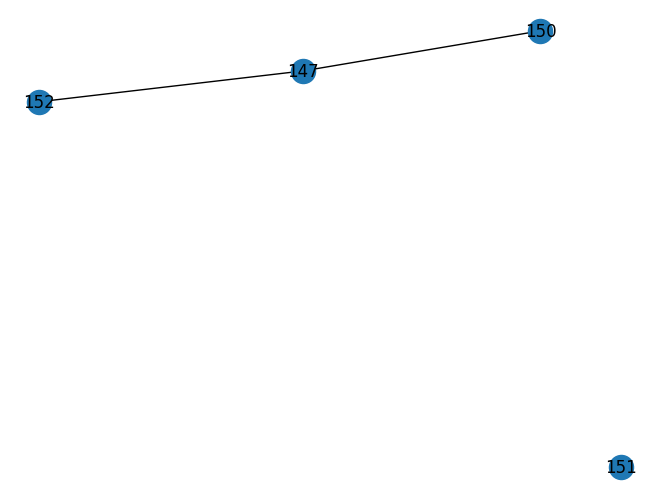


--- Before Global Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  150  147     25.48   20.414361               0.191751   
1  152  147     23.83   31.787745               0.369416   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  \
0              0.000411                0                  False   
1              0.000151                2                   True   

  definite_partner_sk_delete definite_partner_width_delete  
0                       None                          None  
1                       None                          None  
Afer Global query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  150  147     25.48   20.414361               0.191751   
1  152  147     23.83   31.787745               0.369416   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  \
0              0.000411                0                  False   
1              0.000151                2                   True   

  

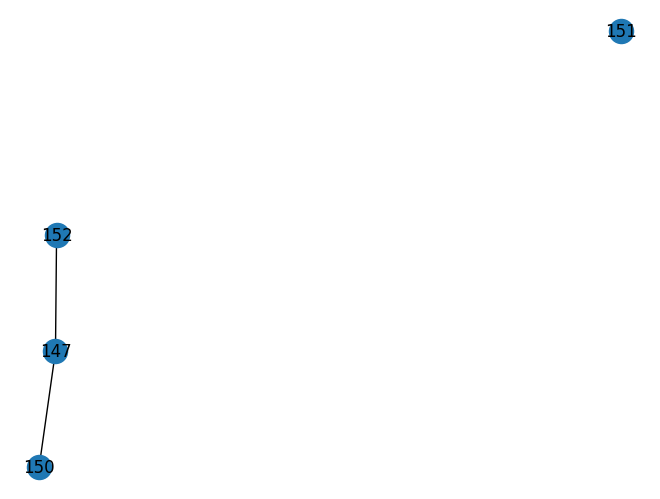


--- Before Node Query ---
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  150  147     25.48   20.414361               0.191751   
1  152  147     23.83   31.787745               0.369416   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  \
0              0.000411                0                  False   
1              0.000151                2                   True   

  definite_partner_sk_delete definite_partner_width_delete  \
0                       None                          None   
1                       None                          None   

  above_threshold_delete  
0                   None  
1                   None  
Afer Node query: 
     u    v  sk_angle  width_diff  width_diff_percentage  \
0  150  147     25.48   20.414361               0.191751   
1  152  147     23.83   31.787745               0.369416   

   synapse_density_diff  n_synapses_diff  none_to_some_synapses  \
0              0.000411                0                

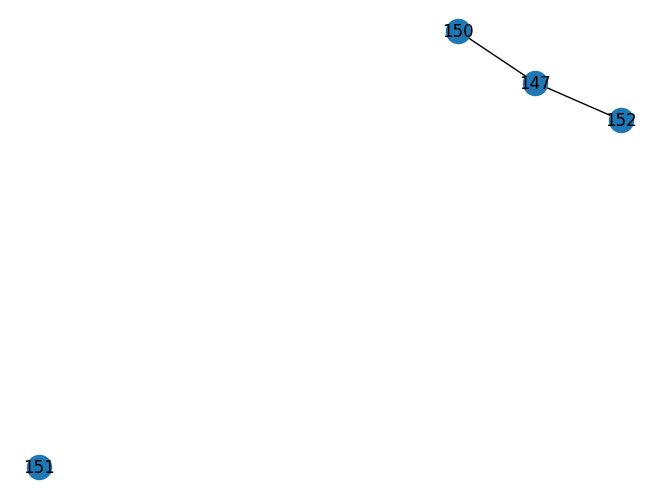

Last group is skipped
Group blue: [152, 147, 150]
Group green: [151]
Group red: []


(None, array([150, 151, 152]))

In [66]:
import error_detection as ed


ed.high_degree_upstream_match(limb_obj,
                             branch_idx = curr_branch,
                              plot_starting_branches = True,
                             plot_extracted_skeletons = False,
                             plot_G_local_edge = True,
                              plot_G_global_edge = True,
                              plot_G_node_edge = True,
                              plot_G_exclusive_partner_edge = True,
                              plot_final_branch_matches = True
                             )